# Iris Flower Plant Dataset
## 1. Dataset Description

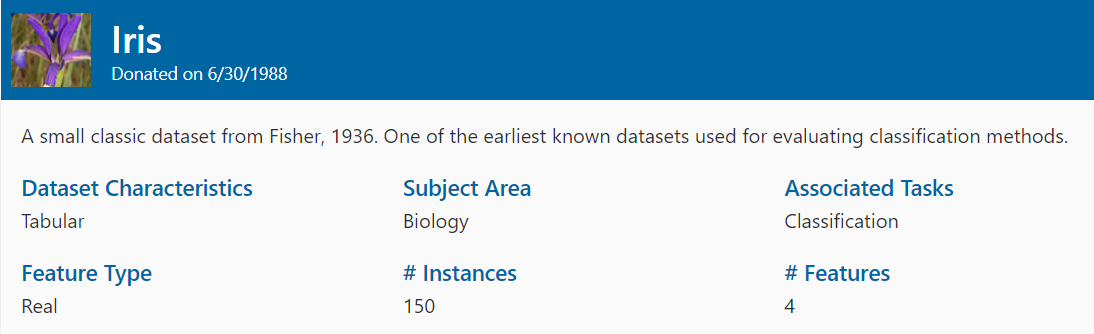

**Thanks To:**
1. [Fighting Overfitting With L1 or L2 Regularization](https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization)
2. [Iris Dataset UCM Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris)

## 1.1 Dataset Information
#### What do the instances in this dataset represent?
Each instance is a plant

## 1.2 Additional Information
This is one of the earliest datasets used in the literature on **classification** methods and widely used in statistics and machine learning.
<br>The data sets contains :-

* 3 classes of **iris flower’ (Setosa, Versicolour, and Virginica)**
* with **50 instances of each,** where each class refers to a type of **iris plant.**
* One class is ***linearly separable from the other 2;***<br>
* the latter are not linearly separable from each other.

### Predicted attribute: class of iris plant.

This is an exceedingly simple domain.<br>
* The **rows** being the **samples** and<br>
* the **columns** being: **Sepal Length, Sepal Width, Petal Length and Petal Width.**

image.png

**Number of Instances:** 150 (50 in each of three classes)

**Number of Attributes:** 4 numeric, predictive attributes and the class

**Attribute Information:**
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: </br>
      -- Iris Setosa</br>
      -- Iris Versicolour</br>
      -- Iris Virginica</br>

**Missing Attribute Values:** None

**Summary Statistics:**
              Min  Max   Mean  SD      Class Correlation</br>
<br>sepal length: 4.3  7.9   5.84  0.83    0.7826
<br>sepal width: 2.0  4.4   3.05  0.43   -0.4194 <br>
petal length: 1.0  6.9   3.76  1.76    0.9490  (high!)</br>
 petal width: 0.1  2.5   1.20  0.76    0.9565  (high!)</br>

**Class Distribution:** 33.3% for each of 3 classes.

## 2. Import libraries

In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from mlxtend.plotting import plot_learning_curves

## 3. Load Dataset

In [2]:
# load the dataset
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# adding the target label to dataframe
df['target'] = dataset.target

## 3. Dataset EDA (exploratory data analysis)
## 3.1 Summarize the Dataset
• Dimensions of the dataset.<br>
• Peek at the data itself.*(Throw a glance at; take a brief look at)*<br>
• Statistical summary of all attributes.<br>
• Breakdown of the data by the class variable.<br>

In [3]:
# dimension of dataset
print("\nShape matirx (rows & columns) ".ljust(50, '.'), ": ", df.shape)


Shape matirx (rows & columns) ................... :  (150, 5)


In [4]:
# peek at the dataset
print("\nA glance at the data content =>\n", df.head(5))


A glance at the data content =>
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [5]:
# statistical summary of all attributes.
print("\nstatistical summary of all attributes =>\n", df.describe())


statistical summary of all attributes =>
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [6]:
# Data Classification by class of flower
print("\nData Classification by class of flower =>\n", df.groupby('target').size())


Data Classification by class of flower =>
 target
0    50
1    50
2    50
dtype: int64


## 4. Data distribution into **independent** and **dependent variable**

In [7]:
X = df.iloc[:, :-1].values
y = df['target'].values

# print("\nIndependent variable =>\n", X)
# print("\nDependent variable =>\n", y)

print("\nShape of independent variable ".ljust(50, '.'), ": ", X.shape)
print("\nShape of dependent variable ".ljust(50, '.'), ": ", y.shape)


Shape of independent variable ................... :  (150, 4)

Shape of dependent variable ..................... :  (150,)


## 5. Data Classification into **train** and **test** set

In [8]:
# splitting dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=24, shuffle=True)

# print("\nIndependent training dataset =>\n", X_train)
# print("\nIndependent test dataset =>\n", X_test)
# print("\nDependent training dataset =>\n", y_train)
# print("\nDependent test dataset =>\n", y_test)

print("\nShape of training dataset ".ljust(50, '.'), ": ", X_train.shape)
print("\nShape of test dataset ".ljust(50, '.'), ": ", X_test.shape)


Shape of training dataset ....................... :  (90, 4)

Shape of test dataset ........................... :  (60, 4)


## 6. Model Creation

In [9]:
# instantiating random forest classifier model
# rf_model = RandomForestClassifier(random_state=24)
rf_model = RandomForestClassifier(n_estimators=100, random_state=24)

# training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=24)

## 7. Data Visualization
* #### [plot_learning_curves](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/#api)
&emsp;Plot learning curves from a **classifier, training and test sets.**
* #### [matplotlib.pyplot.ylim](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)
&emsp;*Get or set the **y-limits** of the current Axes.*

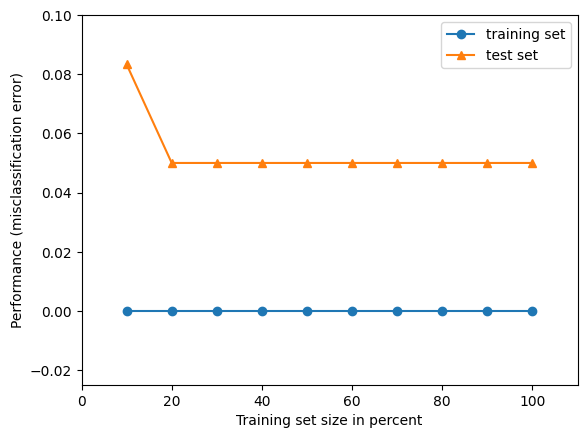

In [10]:
# plotting the learning curve plot
# plot_learning_curves(X_train=X_train, y_train=y_train, X_test=X_test,
#                      y_test=y_test, clf=rf_model, scoring='accuracy',
#                      print_model=True)

plot_learning_curves(X_train=X_train, y_train=y_train, X_test=X_test,
                     y_test=y_test, clf=rf_model, scoring='misclassification error',
                     print_model=False)
plt.ylim(top=0.1, bottom=-0.025)
plt.show()

* In the above image, we can clearly see that our **Random Forest model** is **overfitting** to the **training data.**<br>
* Our **Random Forest model** has a perfect **misclassification error** on the **training set,** but a **0.05 misclassification error** on the **test set.**<br>
* It’s illustrated by the **gap between the 2 lines** on the scatter graph.

There are various ways to combat **overfitting.** Some techniques include  improving the data, such as
* **reducing the number of features** fed into the model with feature selection, or
* by collecting **more data to have more instances** than features.  